
### Banknote Clustering with K-Means (V1 and V2)
In this notebook, we focus on clustering the banknote dataset using only two features: **V1** (variance) and **V2** (skewness). We apply K-Means clustering.


In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the dataset
dt = pd.read_csv('BankNotes_fulldata.arff')

# Extract V1 and V2
taken_data = dt[['V1', 'V2']]
truth = dt['Class (target)']  # This is the ground truth for comparison

# Min-Max Normalization function
def normalization(arr):
    norm = []
    for i in range(arr.shape[1]):
        norm.append((arr[:, i] - arr[:, i].min()) / (arr[:, i].max() - arr[:, i].min()))
    return np.array(norm).T

# Apply normalization to V1 and V2
norm = normalization(taken_data.values)

# Reshape function to match data structure (if necessary)
def reshaped(arr):
    return np.array(arr)

norm = reshaped(norm)

# Apply K-Means clustering to the min-max normalized data (V1 and V2 only)
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
km_res = kmeans.fit(norm)
labels = km_res.labels_


In [6]:
def accuracy(true_labels, predicted_labels):
    return ((true_labels == predicted_labels+1).sum() / len(true_labels))*100

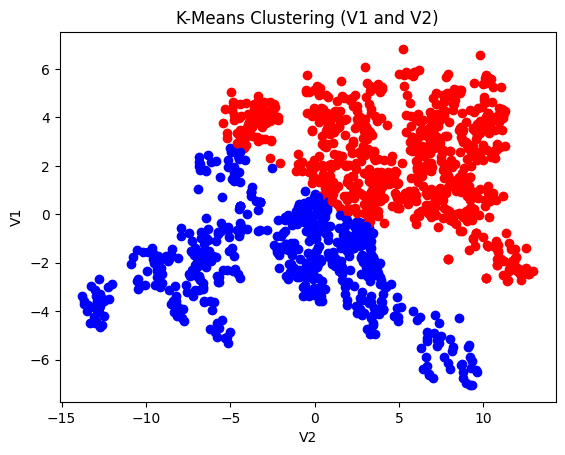

In [7]:
# Plot the clustering result (V1 vs V2)
plt.xlabel('V2')
plt.ylabel('V1')
colors = ['red', 'blue']

for i in range(taken_data.shape[0]):
    plt.scatter(taken_data.iloc[i, 1], taken_data.iloc[i, 0], color=colors[labels[i]])

plt.title("K-Means Clustering (V1 and V2)")
plt.show()


In [8]:
print(f'Accuracy: {accuracy(truth, labels):.2f}%') #Compared to the ground truth.

Accuracy: 87.17%
